/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  5.00000006   1.18157572   2.62017232   6.42157434  10.22301655
  14.02446572  14.03385695  14.03103103  14.02821162  14.02539611
  14.02258343]


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


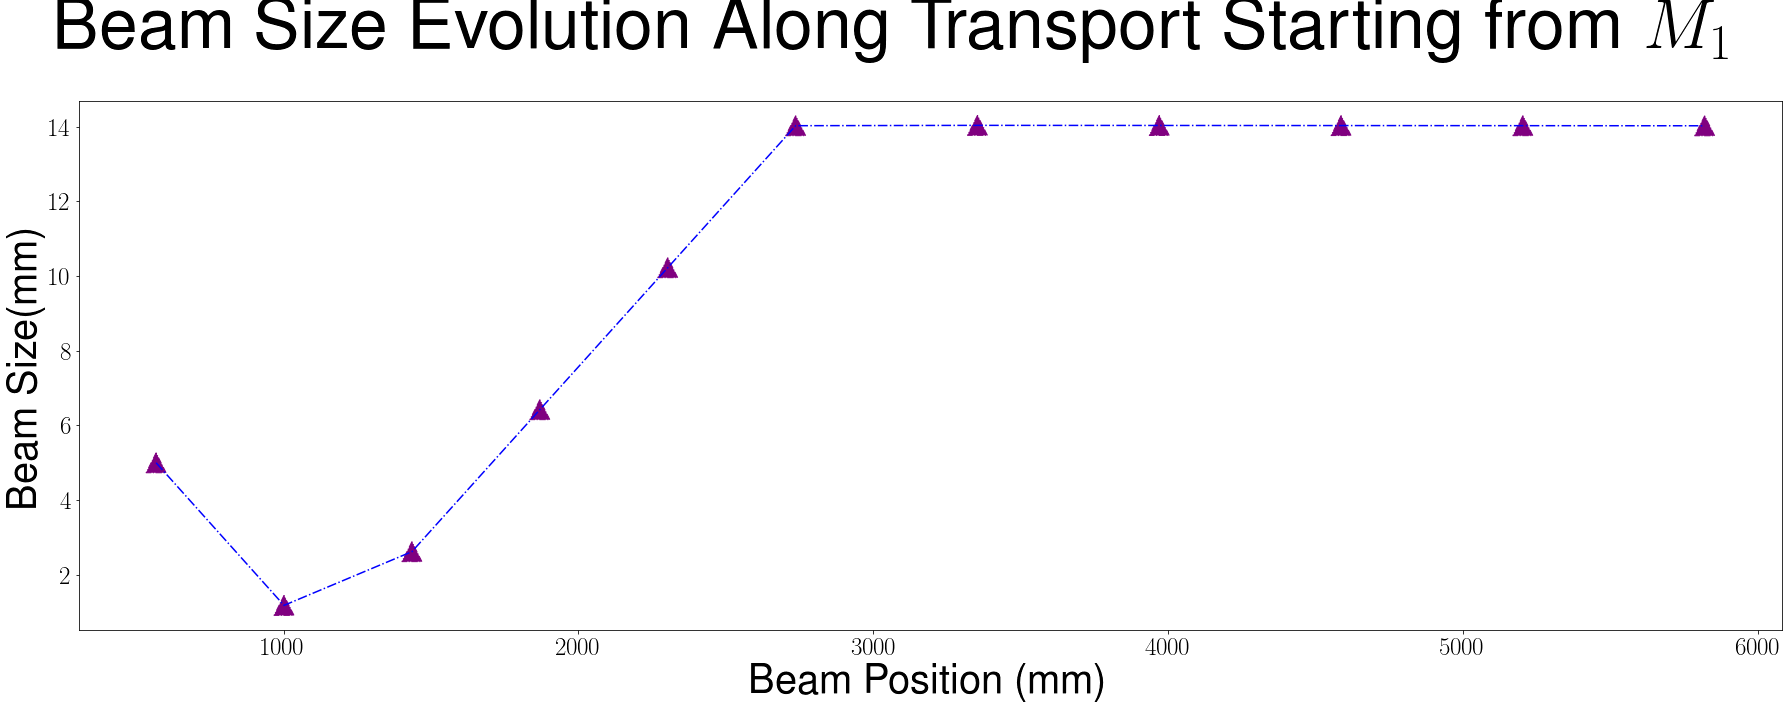

In [6]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

from datetime import datetime
import sys
import os
import time
cpath= Popen(['pwd'], stdout=PIPE, stderr=PIPE).communicate()[0].decode('utf-8').rstrip()

f = filename_generator(cpath)
data_paths = data_pathfiles_generator(cpath)
data_paths.sort()
data_paths.insert(10, data_paths.pop(2))

raw_data = data_generator(data_paths)

waists = np.multiply(2, fit_parameter_extractor(gaussian, raw_data)[2])
print(waists)
pos = []
t = np.arange(568,2800,433.706)
for i in t:
    pos.append(i)

t = np.arange(3352.93, 5820, 616.4)
for i in t:
    pos.append(i)

x = pos
y = waists
cycol = cycle('bgrcmk')
fig = plt.figure(figsize=(25,10))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, y, color = 'purple', linestyle = '-.', s=400, marker = '^')
axes.plot(x,y, c=next(cycol), linestyle = '-.')
axes.tick_params(axis='both',labelsize=40)
axes.legend(fontsize =65)
axes.set_xlabel(str('Beam Position (mm)'), fontsize=30+10)
axes.set_ylabel(str('Beam Size(mm)'), fontsize=30+10)
axes.tick_params(axis='both',labelsize=20+5)
axes.legend(loc = 'upper right', fontsize=20)
fig.suptitle('Beam Size Evolution Along Transport Starting from $M_1$', fontsize=55+15)
fig.tight_layout()
fig.subplots_adjust(top=0.85)




fig.savefig(cpath+ '/'+'collimation' + "-" + '.jpg', dp1=16000)